# Dispositivo de tiro con arco

Un análisis cuantitativo del sistema de tiro con arco de la siguiente figura:

<img src="arco.png" width="200">

Permite recopilar los valores de la fuera $F$ en Newton en función del desplazamiento $x$ en metros. Los datos se resumen en la siguiente tabla:

| Distancia | Fuerza |
|-----------|--------|
| 0.00      | 0      |
| 0.05      | 37     |
| 0.10      | 71     |
| 0.15      | 104    |
| 0.20      | 134    |
| 0.25      | 161    |
| 0.30      | 185    |
| 0.35      | 207    |
| 0.40      | 225    |
| 0.45      | 239    |
| 0.50      | 250    |


Si el arco es lanzado desde una distancia $x=0.5\,m$ calcule la velocidad de una flecha de masa $m=0,075\,Kg$ cuando esta es arrojada por el arco.

*Hint:* la energía cinética de la flecha es igual al trabajo realizado al estirar el arco.

- Definición de Energía Cinética: $E = \frac{1}{2} mv^2$

- Definición de Trabajo: $W = \int_a^b F(x)\,dx$

- Igualando las dos ecuaciones anteriores: $\frac{1}{2} mv^2 = \int_a^b F(x)\,dx$


Actividades:
* Evalúe la integral usando Trapecios y Simpson
* Calcule la velocidad de la flecha para cada valor de $x$ de la tabla.

In [1]:
import numpy as np

x = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
F = np.array([0, 37, 71, 104, 134, 161, 185, 207, 225, 239, 250])
m = 0.075

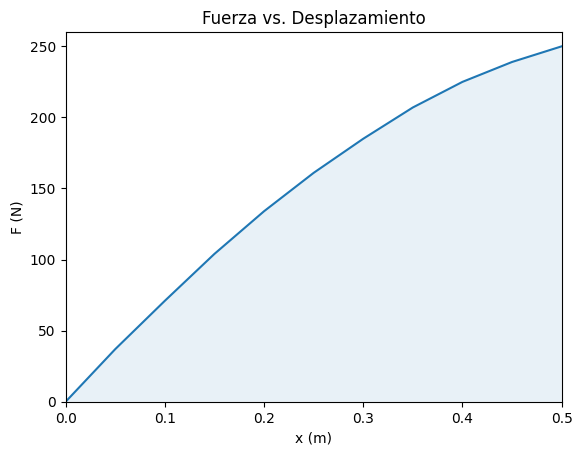

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, F)
plt.fill_between(x, F, 0, alpha=0.1) # Rellenar en color azul bajo la curva
plt.xlim(0, 0.5) # Limitar los valores de x entre 0 y 0.5
plt.ylim(0, 260)
plt.xlabel("x (m)")
plt.ylabel("F (N)")
plt.title("Fuerza vs. Desplazamiento")
plt.show()

In [3]:
def Trapecio(x, F):
    a = x[0]
    b = x[-1]
    n = len(x) - 1
    h = (b - a) / n
    pesos = np.ones(n + 1)
    pesos[1:-1] = 2
    return h / 2 * np.sum(pesos * F)

In [4]:
Trapecio(x, F)

np.float64(74.4)

In [5]:
def Simpson(x, F):
    a = x[0]
    b = x[-1]
    n = len(x) - 1
    h = (b - a) / n
    pesos = np.ones(n + 1)
    pesos[1:-1:2] = 4
    pesos[2:-2:2] = 2
    return h / 3 * np.sum(pesos * F)

In [6]:
Simpson(x, F)

np.float64(74.53333333333333)

*Hint:* la energía cinética de la flecha es igual al trabajo realizado al estirar el arco.

- Definición de Energía Cinética: $E = \frac{1}{2} mv^2$

- Definición de Trabajo: $W = \int_a^b F(x)\,dx$

- Igualando las dos ecuaciones anteriores: $\frac{1}{2} mv^2 = \int_a^b F(x)\,dx$

In [8]:
W = np.zeros(len(x))

for i in range(1, len(x)):
    if i % 2 == 0:
        # Integral using Trapezoidal rule
        W[i] = Trapecio(F[: i + 1], x[: i + 1])
    else:
        # Integral using Simpson's rule
        W[i] = Simpson(F[: i + 1], x[: i + 1])

v = np.sqrt(2 * W / m)
for i, v in zip(x, v):
    print(f"Distancia = {i}, Velocidad = {v}")

Distancia = 0.0, Velocidad = 0.0
Distancia = 0.05, Velocidad = 4.0551750201988135
Distancia = 0.1, Velocidad = 9.72967967955095
Distancia = 0.15, Velocidad = 11.775681155103797
Distancia = 0.2, Velocidad = 18.903262505010435
Distancia = 0.25, Velocidad = 20.372094203155015
Distancia = 0.3, Velocidad = 27.202941017470888
Distancia = 0.35, Velocidad = 28.31455960657495
Distancia = 0.4, Velocidad = 34.64101615137754
Distancia = 0.45, Velocidad = 35.20311434034295
Distancia = 0.5, Velocidad = 40.824829046386306
